<a href="https://colab.research.google.com/github/2022yingjie/Machine_Learning-xitutu/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.什么是逻辑回归(Logistic Regression, LR)
> LR是一种常用的处理二分类任务的模型。为了解决连续的线性模型不适合分类任务的问题，引入非线性函数（激活函数），把线性函数的值域压缩到(0,1)用来表示概率。常用Sigmoid型函数作为激活函数。 LR的本质是极大似然估计。

# 2.什么是Sigmoid（型）函数
>函数公式为：$S(t)=\frac{1}{1+e^{-t}}$，$t=0$时，$S(t)=0.5$，值域在$[0,1]$之间，然后把$(W^{T}X+b)$代入t中，就得到logistic regression的一般方程。

# 3.LR的损失函数
> LR采用交叉熵损失函数，函数公式如下:$$R(w)=-\frac{1}{N}\sum_{n=1}^{N}({y^{n}log(\hat{y})+(1-y^{n})log(1-\hat{y})})$$

> 该损失函数是关于参数$w$的连续可导凸函数，因此可以用梯度下降、牛顿法等来优化。

# 4.LR的优缺点
*   LR能以概率形式输出结果，可解释性强；
*   训练快，收敛速度快；
*   因为结果是概率，所以可以作ranking model；
*   缺点：对数据和场景适应能力有局限性。

















## Logistic regression and regularization
- Regularized logistic regression
    - Hyperparameter "C" is the inverse of the regularization strength
        - Larger "C": less regularization
        - Smaller "C": more regularization
    - regularized loss = original loss + large coefficient penalty
        - more regularization: lower training accuracy
        - more regularization: (almost always) higher test accuracy
- L1 vs. L2 regularization
    - Lasso = linear regression with L1 regularization
    - Ridge = linear regression with L2 regularization

In [5]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

digits = load_digits()

X_train, X_valid, y_train, y_valid = train_test_split(digits.data, digits.target)
print("X_train:", X_train.shape)
print("X_valid:", X_valid.shape)
print("y_train:", y_train.shape)
print("y_valid:", y_valid.shape)

X_train: (1347, 64)
X_valid: (450, 64)
y_train: (1347,)
y_valid: (450,)


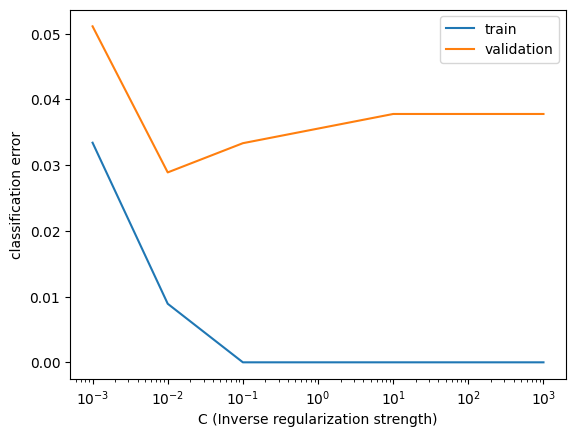

In [8]:
import matplotlib.pyplot as plt
# Train and validation errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C_value
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for C_value in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value, max_iter=10000)
    lr.fit(X_train, y_train)

    # Evalueate error rates and append to lists
    train_errs.append(1.0 - lr.score(X_train, y_train))
    valid_errs.append(1.0 - lr.score(X_valid, y_valid))

# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs);
plt.ylabel('classification error')
plt.xlabel('C (Inverse regularization strength)')
plt.legend(("train", "validation"));

# 代码解读
正则化较大，模型在训练集和测试集上效果都不好。随着正则化程度降低，训练集精度逐渐上升直至过拟合。而测试集精度先上升后下降，说明适度正则化有利于提高模型拟合精度，而过大过小的正则化都会降低模型性能。